# # Data Analyzation and Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')a
import seaborn as sns

In [2]:
df = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

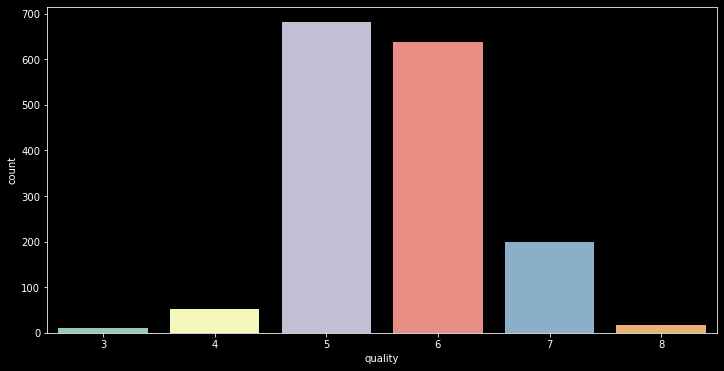

In [4]:
plt.figure(figsize = (12,6))
sns.countplot(df['quality'])
plt.show()

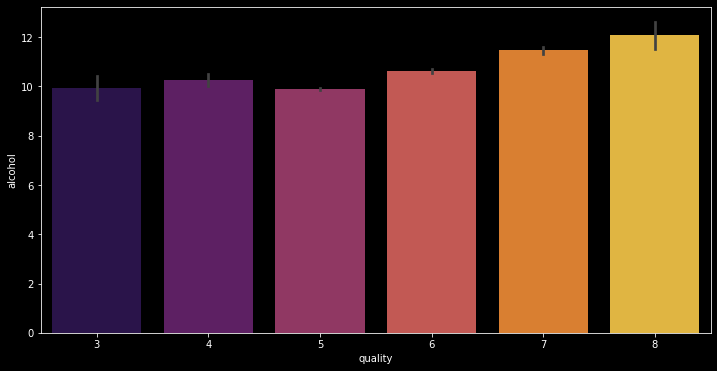

In [5]:
plt.figure(figsize = (12,6))
sns.barplot(x='quality', y = 'alcohol', data = df, palette = 'inferno')
plt.show()

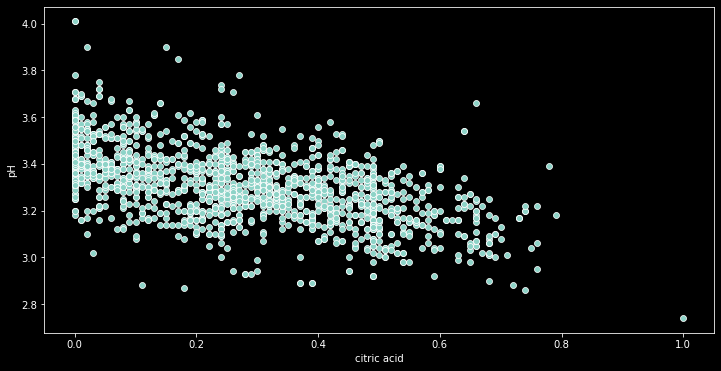

In [6]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='citric acid', y = 'pH', data = df)
plt.show()

<Figure size 864x432 with 0 Axes>

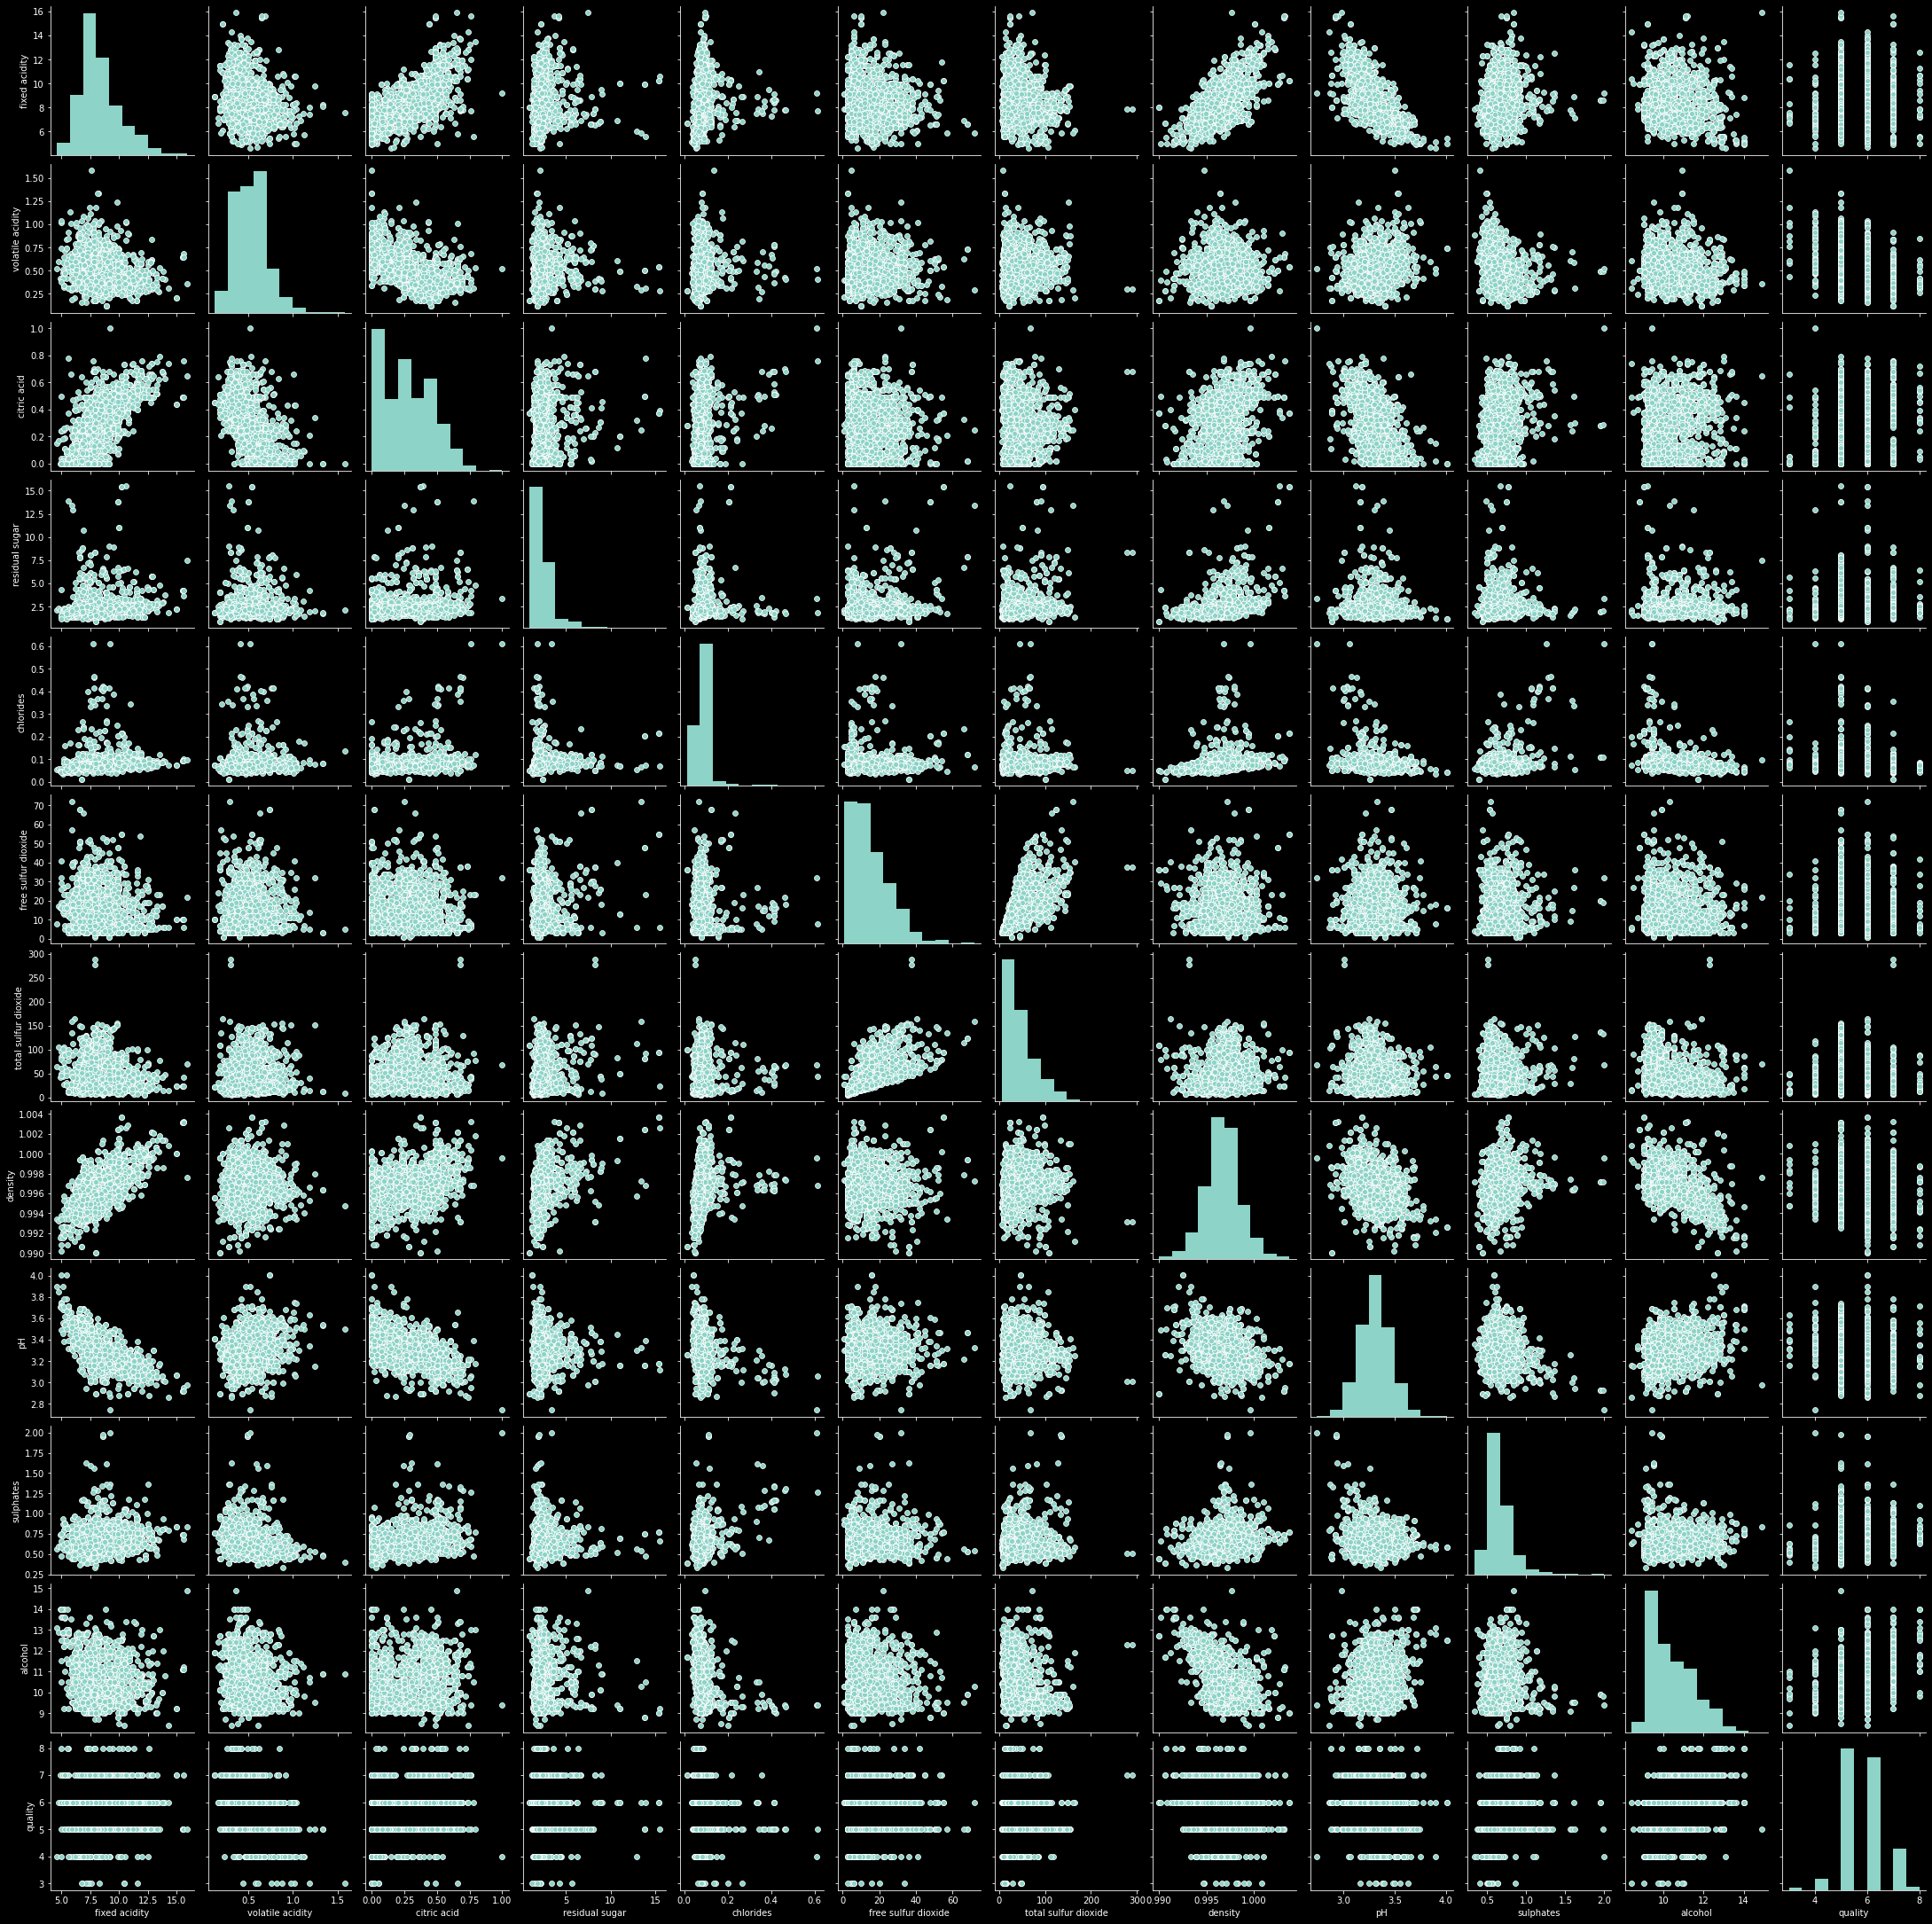

In [7]:
plt.figure(figsize = (12,6))
sns.pairplot(df)
plt.show()

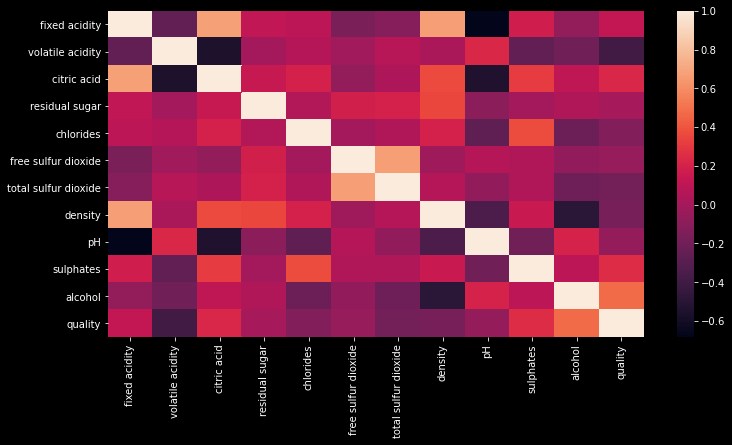

In [8]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr())
plt.show()

In [9]:
x=df.drop(['quality'], axis=1)
y=df['quality']

# # Data Preprocessing

In [10]:
## oversampling
from imblearn.over_sampling import SMOTE
os=SMOTE()
x_res,y_res=os.fit_sample(x, y)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler

stdscale = StandardScaler().fit(x_train)
x_train_std = stdscale.transform(x_train)
x_test_std = stdscale.transform(x_test)

In [13]:
from sklearn.metrics import accuracy_score

# # Implementing different types of models

# # Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_std, y_train)
predictions = lr.predict(x_test_std)
accuracy_score(y_test, predictions)

0.6026894865525673

# # Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_std, y_train)
accuracy_score(y_test, dt.predict(x_test_std))

0.8019559902200489

# # Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_train_std, y_train)
accuracy_score(y_test, rf.predict(x_test_std))

0.8618581907090465

## # SVM Classifier

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear')  
svm.fit(x_train_std, y_train)
svm_predictions = svm.predict(x_test_std)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f"SVM Accuracy: {svm_accuracy}")


SVM Accuracy: 0.628361858190709


## # K Nearest Neighbours (KNN)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(x_train_std, y_train)
knn_predictions = knn.predict(x_test_std)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print(f"KNN Accuracy: {knn_accuracy}")

KNN Accuracy: 0.7652811735941321


## # Naive Bayes Algorithm

In [19]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train_std, y_train)
nb_predictions = nb.predict(x_test_std)
nb_accuracy = accuracy_score(y_test, nb_predictions)

print(f"Naive Bayes Accuracy: {nb_accuracy}")

Naive Bayes Accuracy: 0.4621026894865526


## # Gradient Boosting algorithm

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train_std, y_train)
gb_predictions = gb.predict(x_test_std)
gb_accuracy = accuracy_score(y_test, gb_predictions)

print(f"Gradient Boosting Accuracy: {gb_accuracy}")


Gradient Boosting Accuracy: 0.7909535452322738
